# FIFA 20 overall prediction

Based on the stats of FIFA 19, we'll try to predict the overall of all the players in FIFA 20. Later on, we can use this model to predict the overalls of the players from the future FIAFs.
We'll use libraries such as Pandas and Matplotlib to analyze given data and machine learning models from the Scikit library to construct prediction models to accurately predict the overalls of the players.

## Importing the datasets

Let's start by opening the dataset of the players from FIFA 19 and FIFA 20. We'll use Pandas to open and store the datasets in two different dataframes. We'll select only a handful of columns to reduce the data size as much as possible.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cols_to_use = ['sofifa_id','short_name', 'age', 'height_cm',
               'weight_kg', 'nationality', 'club', 'overall',
               'potential', 'value_eur', 'weak_foot', 'skill_moves',
               'team_position', 
               'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'] 
fifa19 = pd.read_csv('fifa-19.csv', usecols=cols_to_use)
fifa20 = pd.read_csv('fifa-20.csv', usecols=cols_to_use)

fifa19.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,4,5,LW,90.0,93.0,81.0,89.0,35.0,79.0
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,4,4,RW,88.0,91.0,88.0,96.0,32.0,61.0
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,5,5,CAM,92.0,84.0,83.0,95.0,32.0,59.0
3,193080,De Gea,27,193,76,Spain,Manchester United,91,93,72000000,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,5,4,RCM,77.0,86.0,92.0,87.0,60.0,78.0
5,155862,Sergio Ramos,32,184,82,Spain,Real Madrid,91,91,51000000,3,3,LCB,75.0,63.0,71.0,71.0,91.0,84.0
6,176580,L. Suárez,31,182,86,Uruguay,FC Barcelona,91,91,80000000,4,3,ST,80.0,90.0,79.0,88.0,52.0,85.0
7,177003,L. Modrić,32,172,66,Croatia,Real Madrid,91,91,67000000,4,4,RCM,76.0,76.0,90.0,91.0,70.0,67.0
8,183277,E. Hazard,27,173,74,Belgium,Chelsea,91,91,93000000,4,4,LW,91.0,82.0,86.0,94.0,35.0,67.0
9,200389,J. Oblak,25,188,87,Slovenia,Atlético Madrid,90,93,68000000,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fifa20.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,4,4,RW,87.0,92.0,92.0,96.0,39.0,66.0
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,4,5,LW,90.0,93.0,82.0,89.0,35.0,78.0
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,5,5,CAM,91.0,85.0,87.0,95.0,32.0,58.0
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,3,1,GK,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,4,4,LW,91.0,83.0,86.0,94.0,35.0,66.0
5,192985,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,5,4,RCM,76.0,86.0,92.0,86.0,61.0,78.0
6,192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,4,1,GK,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,V. van Dijk,27,193,92,Netherlands,Liverpool,90,91,78000000,3,2,LCB,77.0,60.0,70.0,71.0,90.0,86.0
8,177003,L. Modrić,33,172,66,Croatia,Real Madrid,90,90,45000000,4,4,RCM,74.0,76.0,89.0,89.0,72.0,66.0
9,209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,3,4,RW,93.0,86.0,81.0,89.0,45.0,74.0


ANALYZING THE DATA....

In [4]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sofifa_id      17770 non-null  int64  
 1   short_name     17770 non-null  object 
 2   age            17770 non-null  int64  
 3   height_cm      17770 non-null  int64  
 4   weight_kg      17770 non-null  int64  
 5   nationality    17770 non-null  object 
 6   club           17770 non-null  object 
 7   overall        17770 non-null  int64  
 8   potential      17770 non-null  int64  
 9   value_eur      17770 non-null  int64  
 10  weak_foot      17770 non-null  int64  
 11  skill_moves    17770 non-null  int64  
 12  team_position  17547 non-null  object 
 13  pace           15784 non-null  float64
 14  shooting       15784 non-null  float64
 15  passing        15784 non-null  float64
 16  dribbling      15784 non-null  float64
 17  defending      15784 non-null  float64
 18  physic

In [5]:
fifa20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sofifa_id      18278 non-null  int64  
 1   short_name     18278 non-null  object 
 2   age            18278 non-null  int64  
 3   height_cm      18278 non-null  int64  
 4   weight_kg      18278 non-null  int64  
 5   nationality    18278 non-null  object 
 6   club           18278 non-null  object 
 7   overall        18278 non-null  int64  
 8   potential      18278 non-null  int64  
 9   value_eur      18278 non-null  int64  
 10  weak_foot      18278 non-null  int64  
 11  skill_moves    18278 non-null  int64  
 12  team_position  18038 non-null  object 
 13  pace           16242 non-null  float64
 14  shooting       16242 non-null  float64
 15  passing        16242 non-null  float64
 16  dribbling      16242 non-null  float64
 17  defending      16242 non-null  float64
 18  physic

Here we can see that not all columns have equal no. of data in both the fifa19 and fifa20 files. 

In [6]:
print(fifa19.shape)
print(fifa20.shape)

(17770, 19)
(18278, 19)


The FIFA 19 dataframe has 17770 rows, whereas, the FIFA 20 one has 18278 rows, indicating a larger player database.

Now, let's add the FIFA 20 overall column to our FIFA 19 dataframe to help us train our model.

In [7]:
def get20overall (row):
    try:
        return fifa20[fifa20['sofifa_id'] == row.sofifa_id].overall.values[0]
    except:
        return np.NaN

fifa19['20_overall'] = fifa19.apply (lambda row: get20overall(row), axis=1)
fifa19 = fifa19.dropna()
fifa19.head()

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,20_overall
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,4,5,LW,90.0,93.0,81.0,89.0,35.0,79.0,93.0
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,4,4,RW,88.0,91.0,88.0,96.0,32.0,61.0,94.0
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,5,5,CAM,92.0,84.0,83.0,95.0,32.0,59.0,92.0
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,5,4,RCM,77.0,86.0,92.0,87.0,60.0,78.0,91.0
5,155862,Sergio Ramos,32,184,82,Spain,Real Madrid,91,91,51000000,3,3,LCB,75.0,63.0,71.0,71.0,91.0,84.0,89.0


Now let's remove the GK position since they have different attributes

In [8]:
fifa19 = fifa19[fifa19.team_position != "GK"]
fifa19.drop_duplicates(inplace=True)

In [9]:
fifa19.info()

#equal number of data for all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 17769
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sofifa_id      11592 non-null  int64  
 1   short_name     11592 non-null  object 
 2   age            11592 non-null  int64  
 3   height_cm      11592 non-null  int64  
 4   weight_kg      11592 non-null  int64  
 5   nationality    11592 non-null  object 
 6   club           11592 non-null  object 
 7   overall        11592 non-null  int64  
 8   potential      11592 non-null  int64  
 9   value_eur      11592 non-null  int64  
 10  weak_foot      11592 non-null  int64  
 11  skill_moves    11592 non-null  int64  
 12  team_position  11592 non-null  object 
 13  pace           11592 non-null  float64
 14  shooting       11592 non-null  float64
 15  passing        11592 non-null  float64
 16  dribbling      11592 non-null  float64
 17  defending      11592 non-null  float64
 18  physic

Let's first visualize how many types of team_position there are

In [10]:
fifa19.team_position.value_counts()

SUB    4754
RES    1504
RCB     539
LCB     533
RB      473
LB      464
ST      369
RM      357
LM      349
LCM     324
RCM     323
CAM     258
LDM     212
RDM     199
RS      164
LS      162
CDM     123
LW      120
RW      119
CB       67
CM       49
LWB      34
RWB      30
RAM      19
LAM      18
CF       10
RF       10
LF        9
Name: team_position, dtype: int64

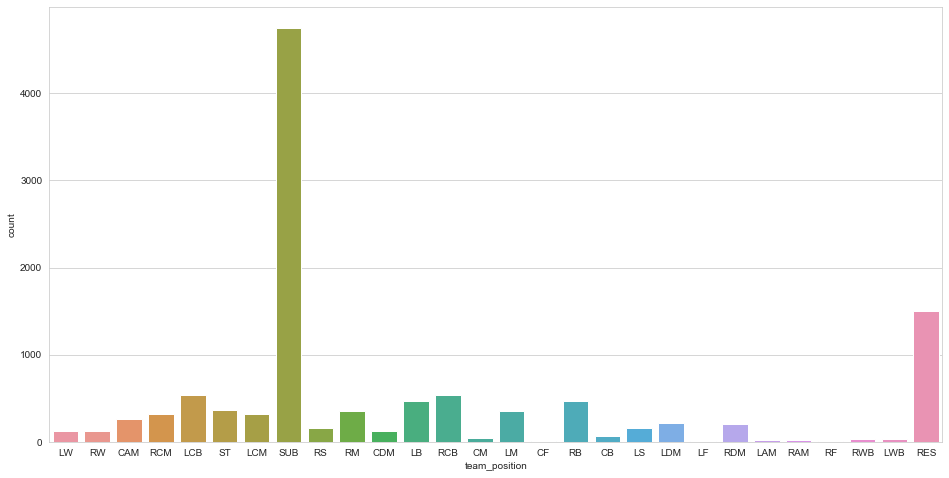

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x='team_position',data=fifa19)

plt.show()

Since there are too many positions, we are going to categorize them into 5 groups

Forward, Midfielder, Defender, Subsitute, Reserve


In [11]:

def position (row):
    if(row.team_position == "RB" or row.team_position == "CB" or row.team_position == "LB" or 
       row.team_position == "LWB" or row.team_position == "RCB"or row.team_position == "RWB" or 
       row.team_position == "LCB"):
        return 'Defender'
    if(row.team_position == "RW" or row.team_position == "CF" or row.team_position == "LW" or 
       row.team_position == "ST" or row.team_position == "RS"or row.team_position == "LS"
       or row.team_position == "LF"or row.team_position == "RF"):
        return 'Forward'
    if(row.team_position == "RM" or row.team_position == "CM" or row.team_position == "LM"
       or row.team_position == "CAM" or row.team_position == "LDM" or row.team_position == "RDM"
      or row.team_position == "LAM"or row.team_position == "RAM" or row.team_position == "CDM"
       or row.team_position == "RCM"or row.team_position == "LCM"):
        return 'Midfielder'
    if (row.team_position == "SUB"):
        return 'Substitute'
    if (row.team_position == "RES"):
        return 'Reserve'
    return "other"

fifa19['field_position'] = fifa19.apply (lambda row: position(row), axis=1)


In [12]:
fifa19.head(10)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,20_overall,field_position
0,20801,Cristiano Ronaldo,33,187,83,Portugal,Juventus,94,94,77000000,...,5,LW,90.0,93.0,81.0,89.0,35.0,79.0,93.0,Forward
1,158023,L. Messi,31,170,72,Argentina,FC Barcelona,94,94,110500000,...,4,RW,88.0,91.0,88.0,96.0,32.0,61.0,94.0,Forward
2,190871,Neymar Jr,26,175,68,Brazil,Paris Saint-Germain,92,93,118500000,...,5,CAM,92.0,84.0,83.0,95.0,32.0,59.0,92.0,Midfielder
4,192985,K. De Bruyne,27,181,70,Belgium,Manchester City,91,92,102000000,...,4,RCM,77.0,86.0,92.0,87.0,60.0,78.0,91.0,Midfielder
5,155862,Sergio Ramos,32,184,82,Spain,Real Madrid,91,91,51000000,...,3,LCB,75.0,63.0,71.0,71.0,91.0,84.0,89.0,Defender
6,176580,L. Suárez,31,182,86,Uruguay,FC Barcelona,91,91,80000000,...,3,ST,80.0,90.0,79.0,88.0,52.0,85.0,89.0,Forward
7,177003,L. Modrić,32,172,66,Croatia,Real Madrid,91,91,67000000,...,4,RCM,76.0,76.0,90.0,91.0,70.0,67.0,90.0,Midfielder
8,183277,E. Hazard,27,173,74,Belgium,Chelsea,91,91,93000000,...,4,LW,91.0,82.0,86.0,94.0,35.0,67.0,91.0,Forward
12,182493,D. Godín,32,187,78,Uruguay,Atlético Madrid,90,90,44000000,...,2,LCB,68.0,48.0,65.0,62.0,89.0,84.0,88.0,Defender
13,182521,T. Kroos,28,183,76,Germany,Real Madrid,90,90,76500000,...,3,LCM,67.0,82.0,89.0,82.0,74.0,69.0,88.0,Midfielder


## Ratings' average per position

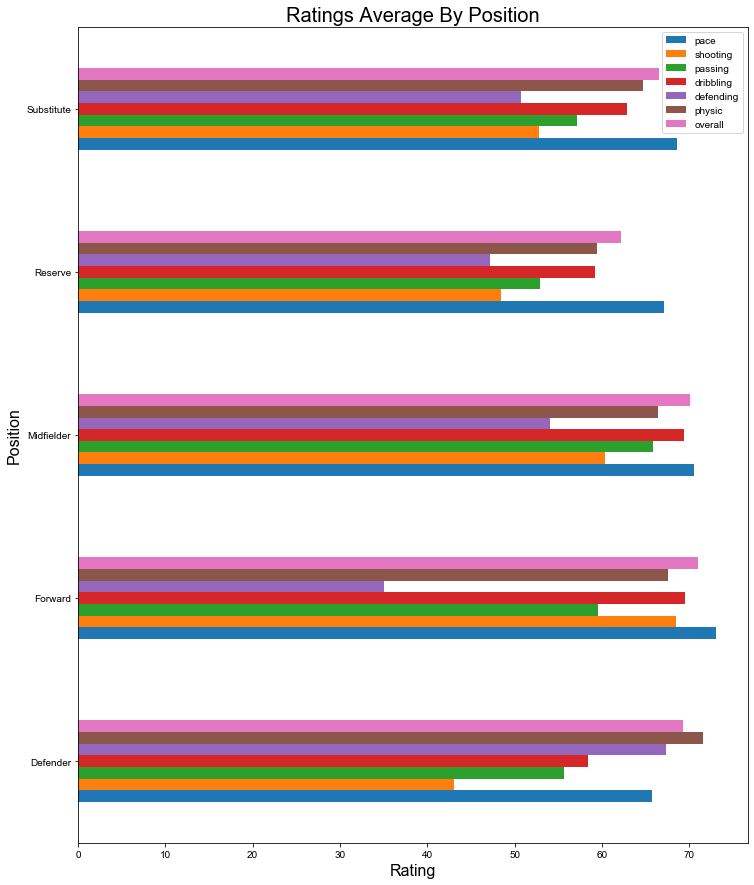

In [13]:
ratingsByPositions = fifa19.groupby([fifa19['field_position']]).mean()
ratingsByPositions = ratingsByPositions
ratingsByPositions = ratingsByPositions[['pace','shooting','passing','dribbling','defending','physic','overall']]
ratingsByPositions.plot(kind='barh', figsize=(12,15))

sns.set_style('whitegrid')
plt.title('Ratings Average By Position',fontsize=20)
plt.xlabel('Rating',fontsize=16)
plt.ylabel('Position',fontsize=16)

plt.show()

## Overall average comparisons

Now, we'll compare the overall mean of the five field positions. Judging from the above graph, the forwards, midfielders and the defenders should have similar mean overalls, followed by the overall of the substitutes and then the reserves.

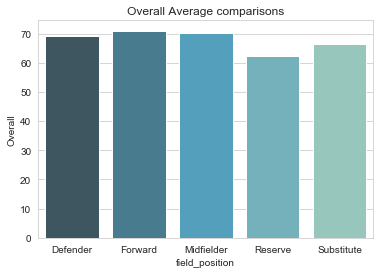

In [14]:
overall = fifa19.groupby(fifa19['field_position']).mean().overall
sns.barplot(x=overall.index, y=overall, palette="GnBu_d")
plt.ylabel('Overall')
plt.title('Overall Average comparisons')

plt.show()

## Percentage of overall players per position

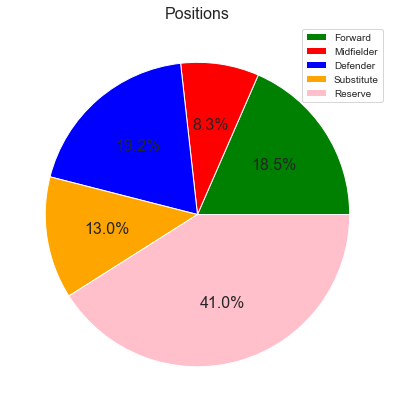

In [15]:
by_pos = fifa19.groupby(fifa19['field_position']).count().age

by_pos.plot(kind='pie',figsize=(7,7), colors=['green','red','blue','orange','pink'], labels=None, autopct='%1.1f%%', fontsize=16)

plt.legend(labels=fifa19['field_position'].unique())
plt.title('Positions', fontsize=16)
plt.ylabel('')

plt.show()

## Mean player value per position

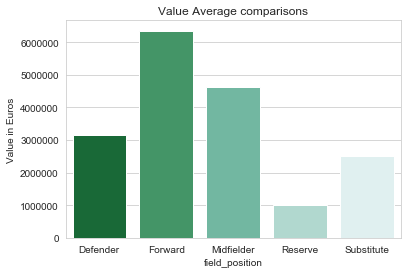

In [16]:
value = fifa19.groupby(fifa19['field_position']).mean().value_eur
sns.barplot(x=value.index, y=value, palette="BuGn_r")
plt.ylabel('Value in Euros')
plt.title('Value Average comparisons')

plt.show()

## Distribution of overall values

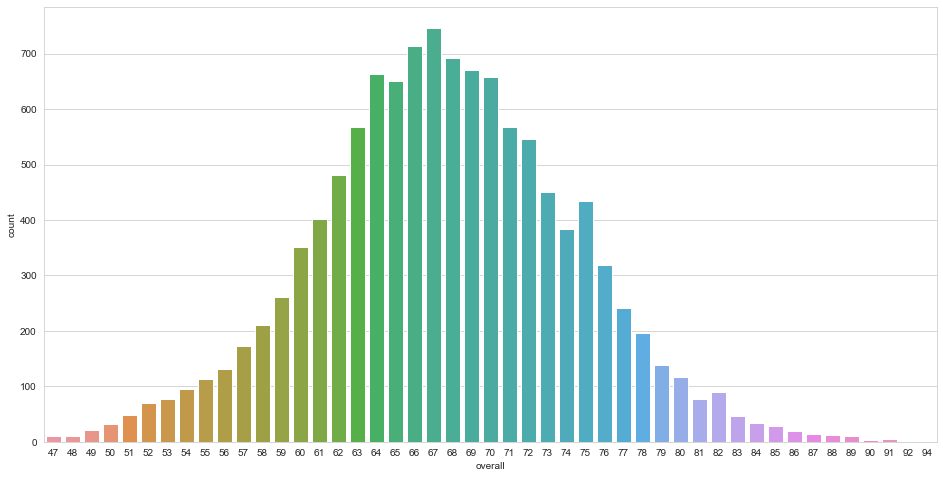

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x='overall',data=fifa19)

plt.show()

## Preparing training and testing data

After analyzing the data, we split the train data and the test data and preprocess it using the StandardScaler which will scale it to unit variance.

In [19]:
X = fifa19[['overall','potential','pace', 'shooting','passing', 'dribbling'
        ,'defending', 'physic','age','team_position','value_eur','weak_foot','skill_moves']]
X.loc[:,'team_position'] = X.loc[:,'team_position'].apply(hash)
y = fifa19['20_overall'].apply(hash)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_Test)

## Training the model

Now, it's time to train the model.The model selected for this particular problem is the Multi-layer Perceptron Classifier, which optimizes a log-loss function. It can also has a regularization term added to the loss function that shrinks model parameters to prevent over-fitting.

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          48       0.00      0.00      0.00         3
          49       0.00      0.00      0.00         6
          50       0.00      0.00      0.00         2
          51       0.14      0.25      0.18         4
          52       0.00      0.00      0.00         8
          53       0.00      0.00      0.00         6
          54       0.10      0.17      0.12        12
          55       0.00      0.00      0.00        21
          56       0.15      0.65      0.24        20
          57       0.00      0.00      0.00        27
          58       0.10      0.08      0.09        24
          59       0.35      0.36      0.36        44
          60       0.19      0.31      0.24        64
          61       0.17      0.07      0.10        56
          62       0.23      0.39      0.29        92
          63       0.22      0.14      0.17       110
          64       0.28      0.25      0.27       139
          65       0.29    

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It's accuracy is 24 percent. We'll also try other models to figure out whether we'll get better accuracies.